In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("car_price_dataset.csv")

In [3]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [4]:
df.shape

(10000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [6]:
df.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

In [7]:
df_dummies = pd.get_dummies(df, columns=['Brand'])

In [8]:
df_dummies = pd.get_dummies(df, columns=['Model'])

In [9]:
df_dummies = pd.get_dummies(df, columns=['Fuel_Type'])

In [10]:
df_dummies = pd.get_dummies(df, columns=['Transmission'])
print(df_dummies)

           Brand     Model  Year  Engine_Size Fuel_Type  Mileage  Doors  \
0            Kia       Rio  2020          4.2    Diesel   289944      3   
1      Chevrolet    Malibu  2012          2.0    Hybrid     5356      2   
2       Mercedes       GLA  2020          4.2    Diesel   231440      4   
3           Audi        Q5  2023          2.0  Electric   160971      2   
4     Volkswagen      Golf  2003          2.6    Hybrid   286618      3   
...          ...       ...   ...          ...       ...      ...    ...   
9995         Kia    Optima  2004          3.7    Diesel     5794      2   
9996   Chevrolet    Impala  2002          1.4  Electric   168000      2   
9997         BMW  3 Series  2010          3.0    Petrol    86664      5   
9998        Ford  Explorer  2002          1.4    Hybrid   225772      4   
9999  Volkswagen    Tiguan  2001          2.1    Diesel   157882      3   

      Owner_Count  Price  Transmission_Automatic  Transmission_Manual  \
0               5   8501  

In [11]:
df_dummies = pd.get_dummies(df, columns=['Transmission'])
print(df_dummies)

           Brand     Model  Year  Engine_Size Fuel_Type  Mileage  Doors  \
0            Kia       Rio  2020          4.2    Diesel   289944      3   
1      Chevrolet    Malibu  2012          2.0    Hybrid     5356      2   
2       Mercedes       GLA  2020          4.2    Diesel   231440      4   
3           Audi        Q5  2023          2.0  Electric   160971      2   
4     Volkswagen      Golf  2003          2.6    Hybrid   286618      3   
...          ...       ...   ...          ...       ...      ...    ...   
9995         Kia    Optima  2004          3.7    Diesel     5794      2   
9996   Chevrolet    Impala  2002          1.4  Electric   168000      2   
9997         BMW  3 Series  2010          3.0    Petrol    86664      5   
9998        Ford  Explorer  2002          1.4    Hybrid   225772      4   
9999  Volkswagen    Tiguan  2001          2.1    Diesel   157882      3   

      Owner_Count  Price  Transmission_Automatic  Transmission_Manual  \
0               5   8501  

In [12]:
# Handle missing values (fill with median for numerical and mode for categorical)
df.fillna(df.median(numeric_only=True), inplace=True)  
df.fillna(df.mode().iloc[0], inplace=True) 

In [13]:

# Split data into features and target
X = df.drop("Price", axis=1)
y = df["Price"]


In [14]:
# Convert categorical variables to numeric (One-Hot Encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

In [15]:
# Feature scaling (important for Linear Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:

# Initialize and fit the model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
print("Model Accuracy (R² Score):", reg.score(X_test, y_test))


Model Accuracy (R² Score): 0.999541749502615


In [19]:
df.Brand.value_counts()

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

In [20]:
df.Model.value_counts()

Model
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     347
Golf        339
A3          338
Optima      336
Civic       336
3 Series    335
Explorer    334
Malibu      333
Tucson      329
Passat      329
Rio         327
Corolla     325
RAV4        324
Camry       321
E-Class     321
Sonata      319
Equinox     315
GLA         315
Sportage    313
X5          311
CR-V        308
C-Class     306
Name: count, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Car Price Distribution

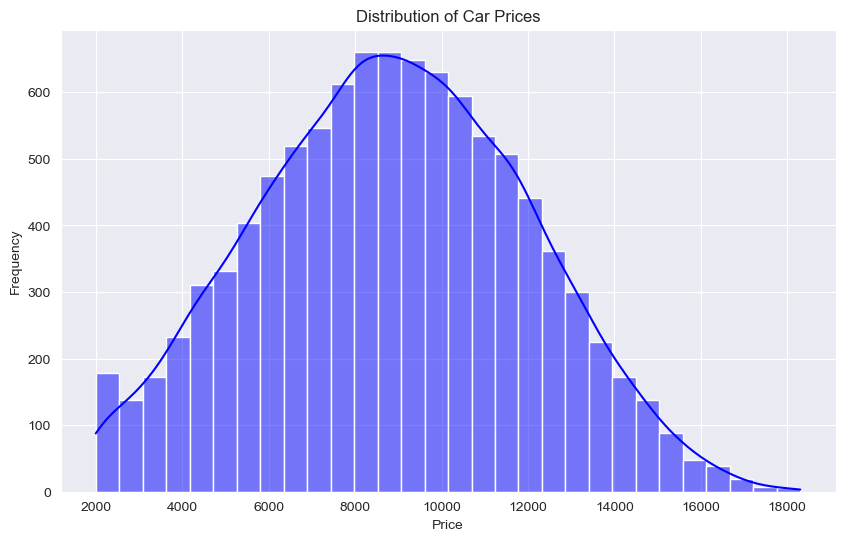

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], bins=30, kde=True, color="blue")
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

* Most cars are clustered in the lower price range, with a few luxury models creating a long right tail.

# Plot: Average Car Price by Fuel Type

C:\Users\DELL\AppData\Local\Temp\ipykernel_11280\3119877260.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_price.index, y=fuel_price.values, palette="viridis")


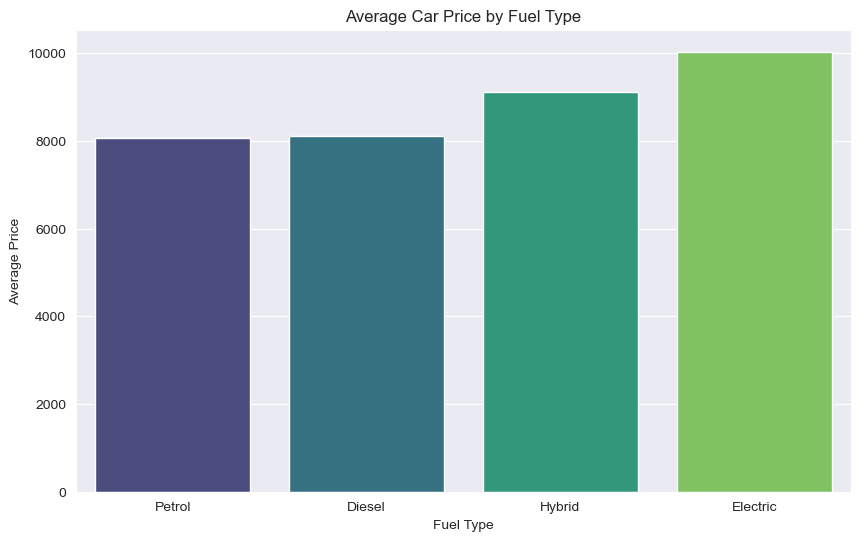

In [25]:
fuel_price = df.groupby("Fuel_Type")["Price"].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_price.index, y=fuel_price.values, palette="viridis")
plt.title("Average Car Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.show()

* Electric cars command the highest average price, followed by hybrids and diesel vehicles.

# Plot: Mileage vs. Price

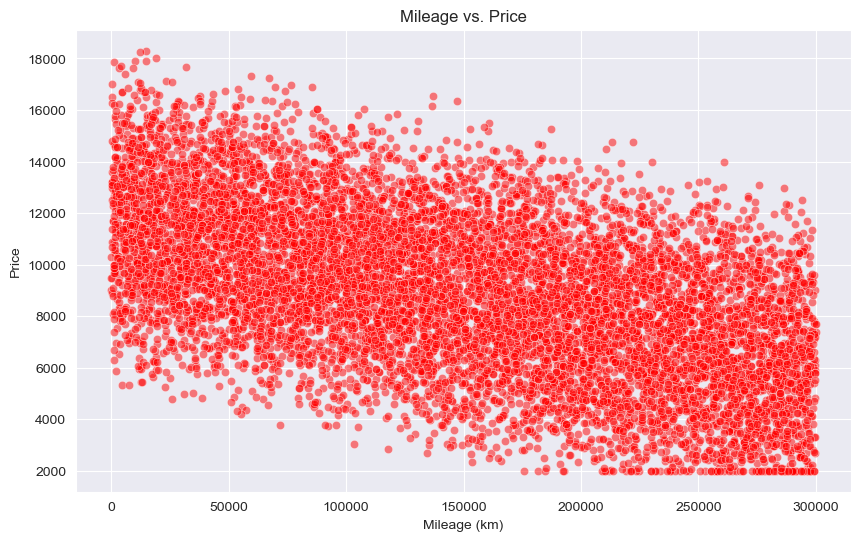

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Mileage"], y=df["Price"], alpha=0.5, color="red")
plt.title("Mileage vs. Price")
plt.xlabel("Mileage (km)")
plt.ylabel("Price")
plt.show()

*  Cars with high mileage have lower resale value, confirming depreciation trends.

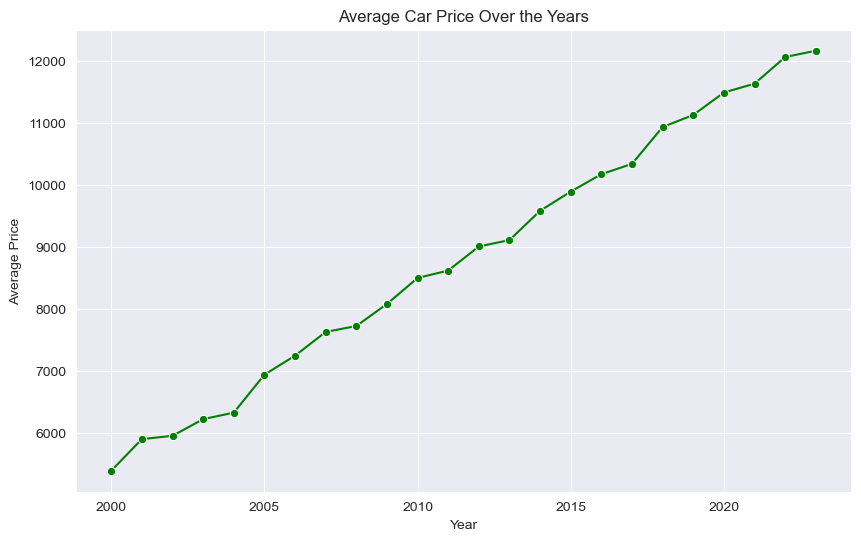

In [29]:
year_price = df.groupby("Year")["Price"].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=year_price.index, y=year_price.values, marker="o", color="green")
plt.title("Average Car Price Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()

* Prices increase with newer models, but some older models hold value, possibly due to brand reputation or rarity.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11280\1487009095.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_price.values, y=brand_price.index, palette="coolwarm")


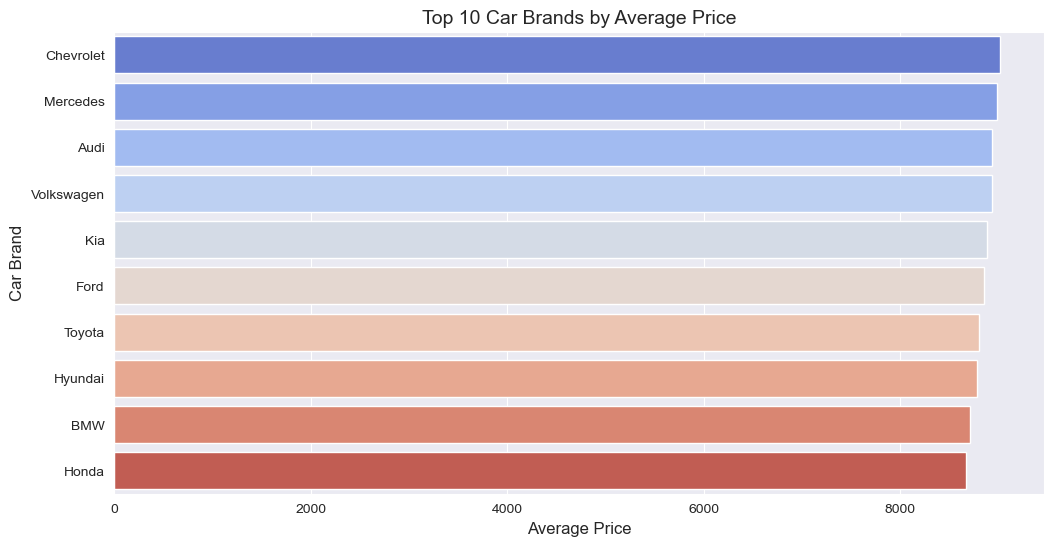

In [31]:
brand_price = df.groupby("Brand")["Price"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_price.values, y=brand_price.index, palette="coolwarm")
plt.title("Top 10 Car Brands by Average Price", fontsize=14)
plt.xlabel("Average Price", fontsize=12)
plt.ylabel("Car Brand", fontsize=12)
plt.show()

* Luxury brands dominate the top 10, indicating stronger resale value.

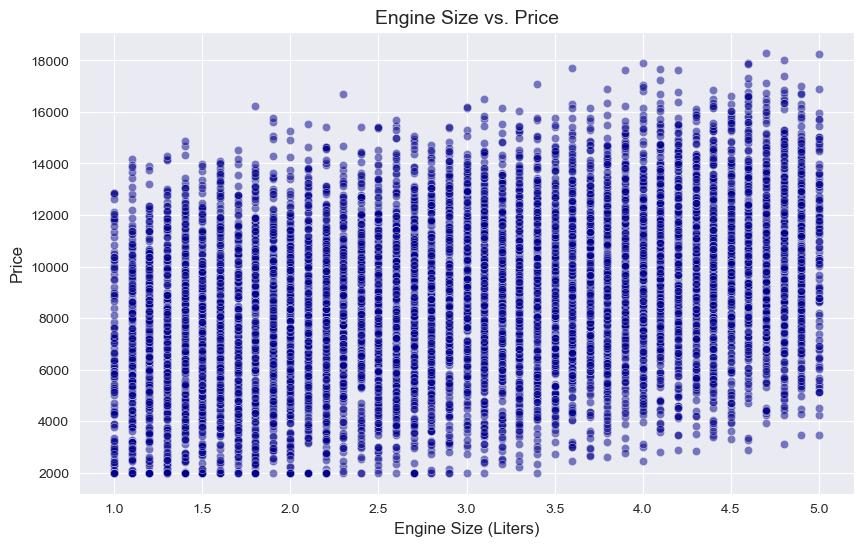

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Engine_Size"], y=df["Price"], alpha=0.5, color="darkblue")
plt.title("Engine Size vs. Price", fontsize=14)
plt.xlabel("Engine Size (Liters)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

* Larger engines generally cost more, but some anomalies suggest exceptions.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11280\1690167149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transmission_price.index, y=transmission_price.values, palette="magma")


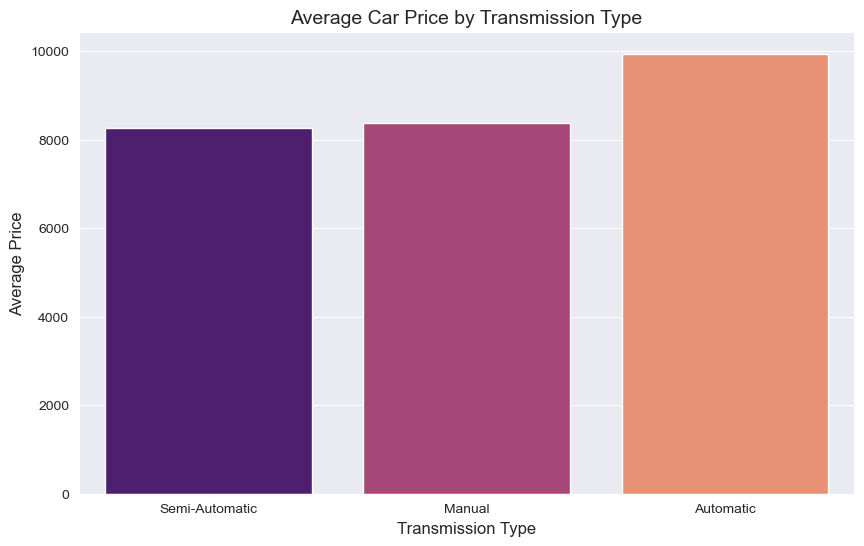

In [126]:
transmission_price = df.groupby("Transmission")["Price"].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=transmission_price.index, y=transmission_price.values, palette="magma")
plt.title("Average Car Price by Transmission Type", fontsize=14)
plt.xlabel("Transmission Type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.show()

* Automatic cars are more expensive, indicating higher demand and advanced technology costs.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11280\4104409042.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=doors_price.index, y=doors_price.values, palette="cubehelix")


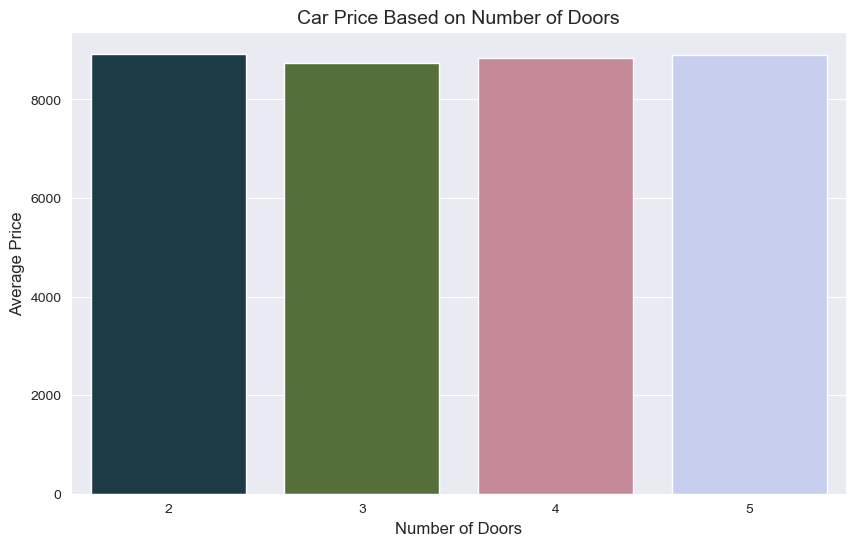

In [37]:
doors_price = df.groupby("Doors")["Price"].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=doors_price.index, y=doors_price.values, palette="cubehelix")
plt.title("Car Price Based on Number of Doors", fontsize=14)
plt.xlabel("Number of Doors", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.show()

* Two-door cars (sports/luxury) are more expensive than regular four-door vehicles.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11280\230823738.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=owner_price.index, y=owner_price.values, palette="crest")


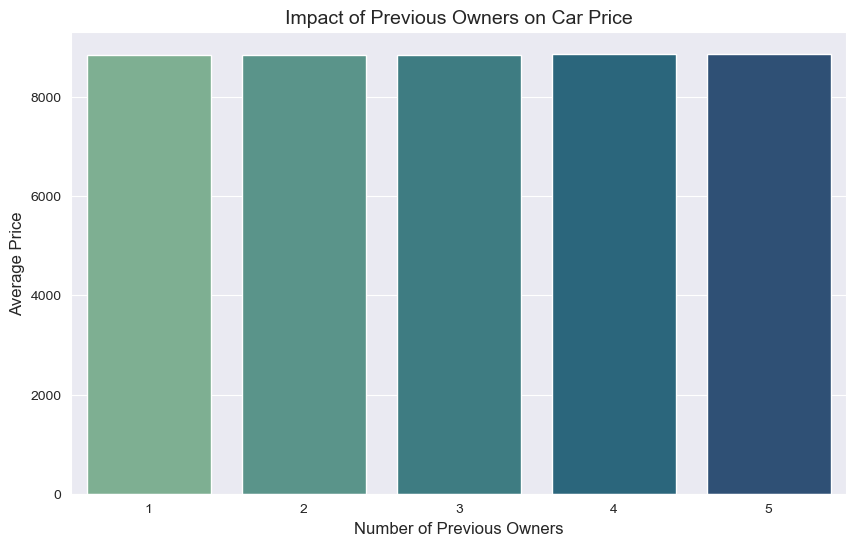

In [39]:
owner_price = df.groupby("Owner_Count")["Price"].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=owner_price.index, y=owner_price.values, palette="crest")
plt.title("Impact of Previous Owners on Car Price", fontsize=14)
plt.xlabel("Number of Previous Owners", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.show()

* cars with fewer previous owners hold their value better.

# No. of Doors Distribution (Bar Plot)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11280\1528880967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Doors"], palette="viridis")


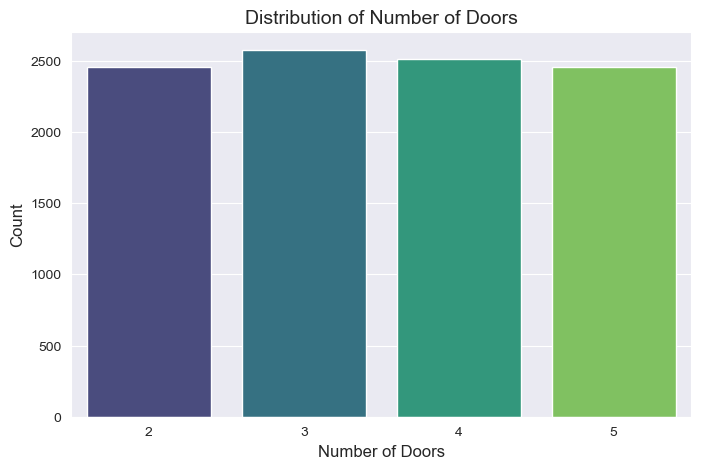

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Doors"], palette="viridis")
plt.title("Distribution of Number of Doors", fontsize=14)
plt.xlabel("Number of Doors", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

* This will reveal whether most cars are 4-door (sedans/SUVs) or 2-door (sports cars/coupes).

# Owner Count vs. Price (Box Plot)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11280\3717930920.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Owner_Count"], y=df["Price"], palette="coolwarm")


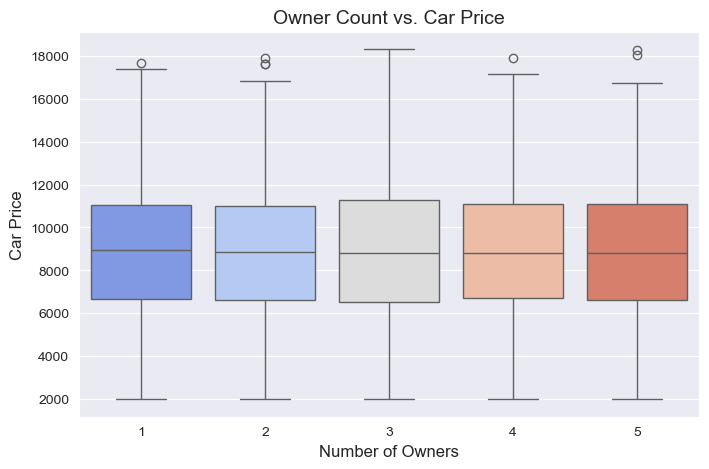

In [91]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Owner_Count"], y=df["Price"], palette="coolwarm")
plt.title("Owner Count vs. Car Price", fontsize=14)
plt.xlabel("Number of Owners", fontsize=12)
plt.ylabel("Car Price", fontsize=12)
plt.show()

* Cars with fewer owners tend to have higher resale prices.

# Year-wise Car Count (Histogram)

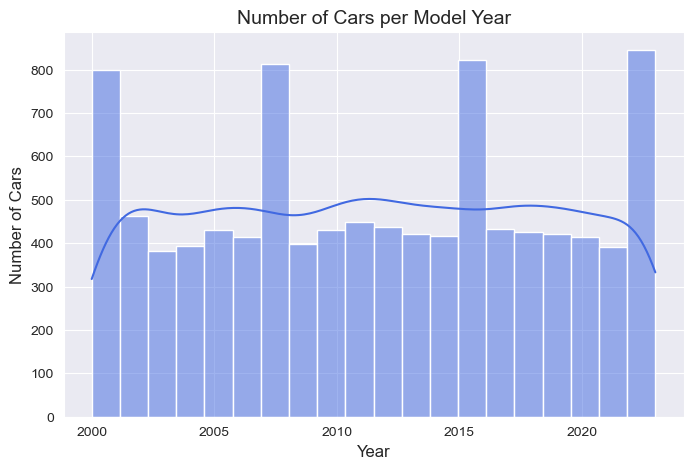

In [93]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Year"], bins=20, kde=True, color="royalblue")
plt.title("Number of Cars per Model Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.show()

* You'll see if most cars are recent models or older vehicles.

# Correlation Heatmap

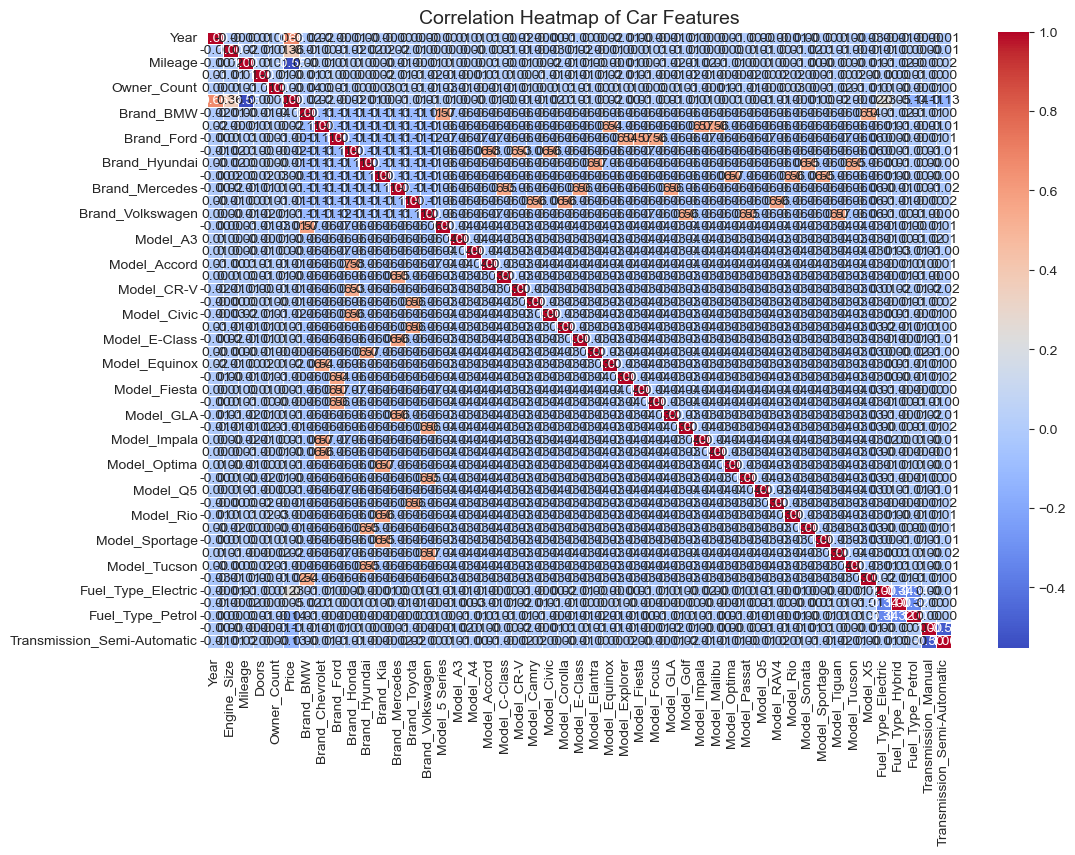

In [101]:
import seaborn as sns
df_encoded = pd.get_dummies(df, drop_first=True)
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Car Features", fontsize=14)
plt.show()

* Strong correlations (e.g., Mileage vs. Price) reveal which features influence car value most.

# Distribution of Engine Sizes (Histogram)

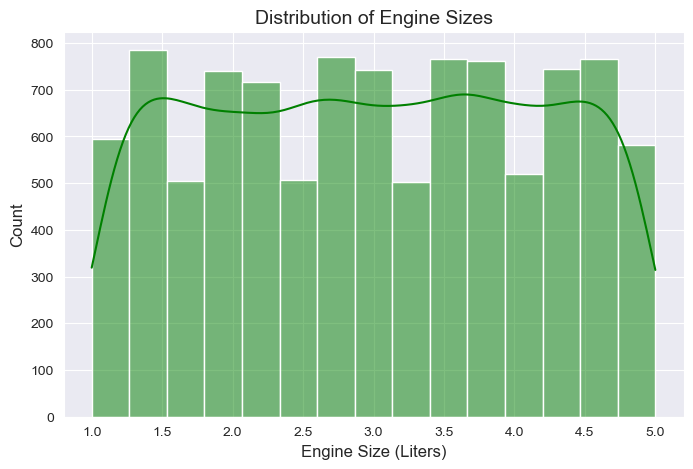

In [97]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Engine_Size"], bins=15, kde=True, color="green")
plt.title("Distribution of Engine Sizes", fontsize=14)
plt.xlabel("Engine Size (Liters)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

* This will show whether smaller engines dominate or if high-displacement cars are frequent.



# Violin Plot: Year vs. Price

C:\Users\DELL\AppData\Local\Temp\ipykernel_11280\522353411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Year"], y=df["Price"], palette="coolwarm")


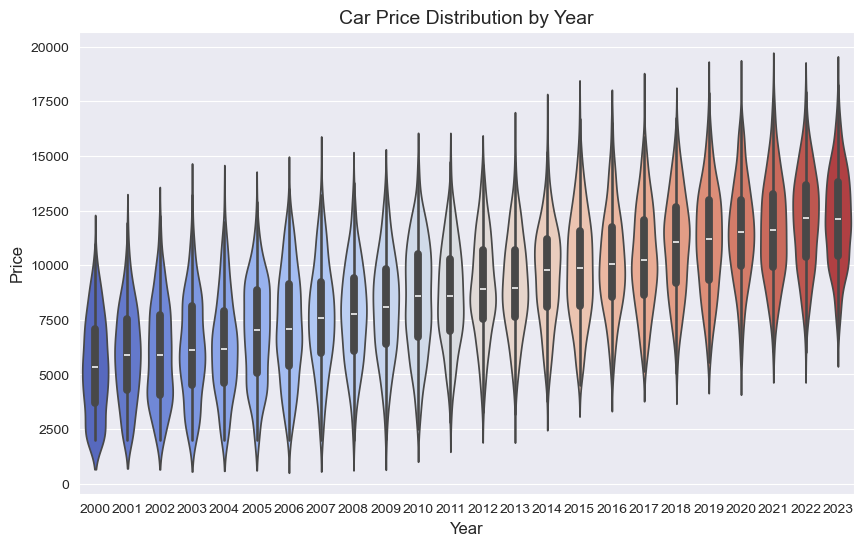

In [99]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df["Year"], y=df["Price"], palette="coolwarm")
plt.title("Car Price Distribution by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

*  The spread of prices in each year will show if newer models hold value better than older ones.